# VirES - access to Østred, CHAMP, Cryosat-2, and Swarm virtual observatories data

This notebook demonstrates access to Østred, CHAMP, Cryosat-2 and Swarm VOBS_1M and VOBS_4M virtual observatory data via the VirES for Swarm API.

Avalable observed and core field data collections

| Collection Name | Description |
|---|---|
| `SW_OPER_VOBS_1M_2_` | Swarm 1 month data from all virtual observatories |
| `SW_OPER_VOBS_1M_2_:<code>` | Swarm 1 month data from one selected virtual observatory |
| `SW_OPER_VOBS_4M_2_` | Swarm 4 month data from all virtual observatories |
| `SW_OPER_VOBS_4M_2_:<code>` | Swarm 4 months data from one selected virtual observatory |
| `CH_OPER_VOBS_4M_2_` | CHAMP 4 month data from all virtual observatories |
| `CH_OPER_VOBS_4M_2_:<code>` | CHAMP 4 months data from one selected virtual observatory |
| `CR_OPER_VOBS_4M_2_` | Cryosat-2 4 month data from all virtual observatories |
| `CR_OPER_VOBS_4M_2_:<code>` | Cryosat-2 4 months data from one selected virtual observatory |
| `OR_OPER_VOBS_4M_2_` | Østred 4 month data from all virtual observatories |
| `OR_OPER_VOBS_4M_2_:<code>` | Østred 4 months data from one selected virtual observatory |
| `CO_OPER_VOBS_4M_2_` | Ørsted, CHAMP, CryoSat-2 and Swarm composite 4 month data from all virtual observatories |
| `CO_OPER_VOBS_4M_2_:<code>` | Ørsted, CHAMP, CryoSat-2 and Swarm composite  4 months data from one selected virtual observatory |

Avalable field secular variation data collections

| Collection Name | Description |
|---|---|
| `SW_OPER_VOBS_1M_2_:SecularVariation` | Swarm 1 month secular variation data from all virtual observatories |
| `SW_OPER_VOBS_1M_2_:SecularVariation:<code>` | Swarm 1 month secular variation data from one selected virtual observatory |
| `SW_OPER_VOBS_4M_2_:SecularVariation` | Swarm 4 month secular variation data from all virtual observatories |
| `SW_OPER_VOBS_4M_2_:SecularVariation:<code>` | Swarm 4 months secular variation data from one selected virtual observatory |
| `CH_OPER_VOBS_4M_2_:SecularVariation` | CHAMP 4 month secular variation data from all virtual observatories |
| `CH_OPER_VOBS_4M_2_:SecularVariation:<code>` | CHAMP 4 secular variation months data from one selected virtual observatory |
| `CR_OPER_VOBS_4M_2_:SecularVariation` | Cryosat-2 4 month secular variation data from all virtual observatories |
| `CR_OPER_VOBS_4M_2_:SecularVariation:<code>` | Cryosat-2 4 months secular variation data from one selected virtual observatory |
| `OR_OPER_VOBS_4M_2_:SecularVariation` | Østred 4 month secular variation data from all virtual observatories |
| `OR_OPER_VOBS_4M_2_:SecularVariation:<code>` | Østred 4 months secular variation data from one selected virtual observatory |
| `CO_OPER_VOBS_4M_2_:SecularVariation` | Ørsted, CHAMP, CryoSat-2 and Swarm composite 4 month secular variation data from all virtual observatories |
| `CO_OPER_VOBS_4M_2_:SecularVariation:<code>` | Ørsted, CHAMP, CryoSat-2 and Swarm composite 4 months secular variation data from one selected virtual observatory |


The `<code>` is a 7-letter "virtual observatories" identifier, unique for each of the 300 "virtual observatories".

Avalable observed and core filed variables (same for all collections)

| Variable | Unit | Dimension | Description |
|---|---|---|---|
| `SiteCode` | $-$ | char [7] | virtual observatory identifier |
| `Timestamp` | $-$ | scalar | UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_CF` | $\text{nT}$ | vector [3] | Core magnetic field vector in ITRF NEC frame. |
| `B_OB` | $\text{nT}$ | vector [3] | Observed magnetic field vector in ITRF NEC frame. |
| `sigma_CF` | $\text{nT}$ | vector [3] | Estimated error of the core magnetic field vector in ITRF NEC frame. |
| `sigma_OB` | $\text{nT}$ | vector [3] | Estimated error of the observed magnetic field vector in ITRF NEC frame. |

Avalable secular variation variables (same for all collections)

| Variable | Unit | Dimension | Description | 
|---|---|---|---|
| `SiteCode` | $-$ | char [7] | virtual observatory identifier |
| `Timestamp` | $-$ | scalar | UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_SV` | $\text{nT}/\text{yr}$ | vector [3] | Field secular variation vector in ITRF NEC frame. |
| `sigma_SV` | $\text{nT}/\text{yr}$ | vector [3] | Estimated error of the field secular variation vector in ITRF NEC frame. |


In [1]:
# pre-release setup

! pip install --upgrade 'git+https://github.com/ESA-VirES/VirES-Python-Client@swarm_gvo#egg=viresclient'

VOBS_SITES = [
    'N90E000',
    'N77W026', 'N77W077', 'N77W129',
    'N77E026', 'N77E077', 'N77E129', 'N77E180',
    'N65W024', 'N65W051', 'N65W079', 'N65W107', 'N65W135', 'N65W162',
    'N65E004', 'N65E032', 'N65E059', 'N65E087', 'N65E115', 'N65E142', 'N65E170',
    'N54W003', 'N54W023', 'N54W043', 'N54W063', 'N54W083', 'N54W103', 'N54W123', 'N54W143', 'N54W163',
    'N54E017', 'N54E037', 'N54E057', 'N54E077', 'N54E097', 'N54E117', 'N54E137', 'N54E157', 'N54E177',
    'N42W007', 'N42W023', 'N42W038', 'N42W054', 'N42W069', 'N42W085', 'N42W101', 'N42W116', 'N42W132', 'N42W148', 'N42W163', 'N42W179',
    'N42E009', 'N42E024', 'N42E040', 'N42E056', 'N42E071', 'N42E087', 'N42E103', 'N42E118', 'N42E134', 'N42E150', 'N42E165',
    'N30W009', 'N30W022', 'N30W036', 'N30W049', 'N30W062', 'N30W076', 'N30W089', 'N30W102', 'N30W116', 'N30W129', 'N30W142', 'N30W156', 'N30W169',
    'N30E004', 'N30E018', 'N30E031', 'N30E044', 'N30E058', 'N30E071', 'N30E084', 'N30E098', 'N30E111', 'N30E124', 'N30E138', 'N30E151', 'N30E164', 'N30E178',
    'N18W010', 'N18W022', 'N18W034', 'N18W046', 'N18W058', 'N18W070', 'N18W082', 'N18W094', 'N18W106', 'N18W118', 'N18W130', 'N18W142', 'N18W154', 'N18W166', 'N18W178',
    'N18E002', 'N18E014', 'N18E026', 'N18E038', 'N18E050', 'N18E062', 'N18E074', 'N18E086', 'N18E098', 'N18E110', 'N18E122', 'N18E134', 'N18E146', 'N18E158', 'N18E170',
    'N06W010', 'N06W021', 'N06W033', 'N06W045', 'N06W056', 'N06W068', 'N06W079', 'N06W091', 'N06W103', 'N06W114', 'N06W126', 'N06W138', 'N06W149', 'N06W161', 'N06W172',
    'N06E002', 'N06E013', 'N06E025', 'N06E037', 'N06E048', 'N06E060', 'N06E072', 'N06E083', 'N06E095', 'N06E106', 'N06E118', 'N06E130', 'N06E141', 'N06E153', 'N06E164', 'N06E176',
    'S06W004', 'S06W016', 'S06W027', 'S06W039', 'S06W050', 'S06W062', 'S06W074', 'S06W085', 'S06W097', 'S06W108', 'S06W120', 'S06W132', 'S06W143', 'S06W155', 'S06W167', 'S06W178',
    'S06E008', 'S06E019', 'S06E031', 'S06E042', 'S06E054', 'S06E066', 'S06E077', 'S06E089', 'S06E101', 'S06E112', 'S06E124', 'S06E135', 'S06E147', 'S06E159', 'S06E170',
    'S18W003', 'S18W015', 'S18W027', 'S18W039', 'S18W051', 'S18W063', 'S18W075', 'S18W087', 'S18W099', 'S18W111', 'S18W123', 'S18W135', 'S18W147', 'S18W159', 'S18W171',
    'S18E009', 'S18E021', 'S18E033', 'S18E045', 'S18E057', 'S18E069', 'S18E081', 'S18E093', 'S18E105', 'S18E117', 'S18E129', 'S18E141', 'S18E153', 'S18E165', 'S18E177',
    'S30W001', 'S30W015', 'S30W028', 'S30W041', 'S30W055', 'S30W068', 'S30W081', 'S30W095', 'S30W108', 'S30W121', 'S30W135', 'S30W148', 'S30W161', 'S30W175',
    'S30E012', 'S30E025', 'S30E039', 'S30E052', 'S30E065', 'S30E079', 'S30E092', 'S30E105', 'S30E119', 'S30E132', 'S30E145', 'S30E159', 'S30E172',
    'S42W014', 'S42W030', 'S42W046', 'S42W061', 'S42W077', 'S42W093', 'S42W108', 'S42W124', 'S42W140', 'S42W155', 'S42W171',
    'S42E001', 'S42E017', 'S42E033', 'S42E048', 'S42E064', 'S42E079', 'S42E095', 'S42E111', 'S42E126', 'S42E142', 'S42E158', 'S42E173',
    'S54W014', 'S54W034', 'S54W054', 'S54W074', 'S54W094', 'S54W114', 'S54W134', 'S54W154', 'S54W174',
    'S54E006', 'S54E026', 'S54E046', 'S54E066', 'S54E086', 'S54E106', 'S54E126', 'S54E146', 'S54E166',
    'S65W041', 'S65W069', 'S65W096', 'S65W124', 'S65W152', 'S65W179',
    'S65E014', 'S65E042', 'S65E070', 'S65E098', 'S65E125', 'S65E153', 'S65W013',
    'S77W063', 'S77W114', 'S77W166',
    'S77E040', 'S77E092', 'S77E143', 'S77W011',
    'S90E000'
]


  Cloning https://github.com/ESA-VirES/VirES-Python-Client (to revision swarm_gvo) to /tmp/pip-install-whaiycds/viresclient
  Created wheel for viresclient: filename=viresclient-0.8.0a0-py3-none-any.whl size=71997 sha256=abfd9fedf445e1ec0ecc5190f9fb6d57ea188b319ca824323a4d6c0c33a5b9dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-r08h8mzv/wheels/d3/d4/f3/ed4b44570cfc4c1529d54fcdf6c4fba7573c4becadc76e9c64
Successfully built viresclient
  Attempting uninstall: viresclient
    Found existing installation: viresclient 0.8.0a0
    Uninstalling viresclient-0.8.0a0:
      Successfully uninstalled viresclient-0.8.0a0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
from numpy import average
from matplotlib.pyplot import figure, subplot, show
from viresclient import SwarmRequest

VOBS_VARIABLES = ['SiteCode', 'B_CF', 'B_OB', 'sigma_CF', 'sigma_OB']
VOBS_SV_VARIABLES = ['SiteCode', 'B_SV', 'sigma_SV']

EARTH_RADIUS = 6371000

VOBS_OR_4M_COLLECTION = "OR_OPER_VOBS_4M_2_"
VOBS_CO_4M_COLLECTION = "CO_OPER_VOBS_4M_2_"

SwarmRequest.PRODUCT_VARIABLES['VOBS_OR_4M'] = VOBS_VARIABLES
SwarmRequest.PRODUCT_VARIABLES['VOBS_CO_4M'] = VOBS_VARIABLES
SwarmRequest.PRODUCT_VARIABLES['VOBS_OR_4M:SecularVariation'] = VOBS_SV_VARIABLES
SwarmRequest.PRODUCT_VARIABLES['VOBS_CO_4M:SecularVariation'] = VOBS_SV_VARIABLES

SwarmRequest.COLLECTIONS['VOBS_OR_4M'] = [VOBS_OR_4M_COLLECTION, *[f'{VOBS_OR_4M_COLLECTION}:{site}' for site in VOBS_SITES]]
SwarmRequest.COLLECTIONS['VOBS_CO_4M'] = [VOBS_CO_4M_COLLECTION, *[f'{VOBS_CO_4M_COLLECTION}:{site}' for site in VOBS_SITES]]

SwarmRequest.COLLECTIONS['VOBS_OR_4M:SecularVariation'] = [f'{VOBS_OR_4M_COLLECTION}:SecularVariation', *[f'{VOBS_OR_4M_COLLECTION}:SecularVariation:{site}' for site in VOBS_SITES]]
SwarmRequest.COLLECTIONS['VOBS_CO_4M:SecularVariation'] = [f'{VOBS_CO_4M_COLLECTION}:SecularVariation', *[f'{VOBS_CO_4M_COLLECTION}:SecularVariation:{site}' for site in VOBS_SITES]]

SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_OR_4M'] = 'P122D'
SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_CO_4M'] = 'P122D'
SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_OR_4M:SecularVariation'] = 'P122D'
SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_CO_4M:SecularVariation'] = 'P122D'


#server_url = None # default VirES server
server_url = 'https://staging.viresdisc.vires.services/ows' # DISC server

request = SwarmRequest(server_url)       

## Swarm, CHAMP, and Cryosat-2 - VOBS_1M and VOBS_4M - one virtual observatory

In [3]:
from datetime import datetime

site = 'S77W114'

collections = {
    'SW_1M': 'SW_OPER_VOBS_1M_2_',
    'SW_4M': 'SW_OPER_VOBS_4M_2_',
    #'CH_1M': 'CH_OPER_VOBS_1M_2_',
    'CH_4M': 'CH_OPER_VOBS_4M_2_',
    'CR_4M': 'CR_OPER_VOBS_4M_2_',
    'OR_4M': 'OR_OPER_VOBS_4M_2_',
    'CO_4M': 'CO_OPER_VOBS_4M_2_',
}
data = {}
data_sv = {}

def download(collection, variables):
    print()
    print(collection)
    request.set_collection(collection)
    request.set_products(measurements=variables)
    return request.get_between(
        start_time='2000-01-01T10:00:00Z',
        end_time=datetime.now(),
        asynchronous=False,
    ).as_xarray()

for source, collection in collections.items():
    data[source] = download(f'{collection}:{site}', VOBS_VARIABLES)
    print(data[source])
    
    data_sv[source] = download(f'{collection}:SecularVariation:{site}', VOBS_SV_VARIABLES)
    print(data_sv[source])



SW_OPER_VOBS_1M_2_:S77W114


      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 85)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2013-12-15T12:00:00 ... 2020-12-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    sigma_CF    (Timestamp, NEC) float64 nan nan nan nan ... 2.34 5.181 7.487
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_OB        (Timestamp, NEC) float64 7.029e+03 1.118e+04 ... -4.019e+04
    sigma_OB    (Timestamp, NEC) float64 17.46 21.85 7.305 ... 12.92 17.52 6.267
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 1.115e+04 -4.018e+04
Attributes:
    Sources:         ['SW_OPER_VOBS_1M_2__20131215T000000_20201215T000000_0104'

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 60)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-07-01T12:00:00 ... 2020-06-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_SV        (Timestamp, NEC) float64 15.17 -10.22 69.18 ... -1.678 75.18
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    sigma_SV    (Timestamp, NEC) float64 1.434 3.213 2.776 ... 1.434 3.213 2.776
Attributes:
    Sources:         ['SW_OPER_VOBS_1M_2__20131215T000000_20201215T000000_0104']
    MagneticModels:  []
    RangeFilters:    []

SW_OPER_VOBS_4M_2_:S77W114


      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 21)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2014-03-01T12:00:00 ... 2020-11-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    sigma_CF    (Timestamp, NEC) float64 2.321 7.434 7.695 ... 2.321 7.434 7.695
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_OB        (Timestamp, NEC) float64 7.044e+03 1.119e+04 ... -4.02e+04
    sigma_OB    (Timestamp, NEC) float64 13.37 14.66 5.103 ... 5.436 6.486 3.124
    B_CF        (Timestamp, NEC) float64 7.046e+03 1.118e+04 ... -4.018e+04
Attributes:
    Sources:         ['SW_OPER_VOBS_4M_2__20140301T000000_20201101T000000_0104'

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 18)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2014-09-15T12:00:00 ... 2020-05-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_SV        (Timestamp, NEC) float64 14.24 -10.2 67.58 ... -10.92 69.41
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    sigma_SV    (Timestamp, NEC) float64 1.747 6.805 3.786 ... 1.747 6.805 3.786
Attributes:
    Sources:         ['SW_OPER_VOBS_4M_2__20140301T000000_20201101T000000_0104']
    MagneticModels:  []
    RangeFilters:    []

CH_OPER_VOBS_4M_2_:S77W114
<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 30)
Coordinates:
  * Time

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 27)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2001-05-15T12:00:00 ... 2010-01-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_SV        (Timestamp, NEC) float64 nan nan nan nan ... 14.86 -2.09 77.06
    Radius      (Timestamp) float64 6.741e+06 6.741e+06 ... 6.741e+06 6.741e+06
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    sigma_SV    (Timestamp, NEC) float64 nan nan nan nan ... 5.164 6.738 4.765
Attributes:
    Sources:         ['CH_OPER_VOBS_4M_2__20001101T000000_20100701T000000_0104']
    MagneticModels:  []
    RangeFilters:    []

CR_OPER_VOBS_4M_2_:S77W114



      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 26)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2010-07-01T12:00:00 ... 2018-11-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    sigma_CF    (Timestamp, NEC) float64 nan nan nan 5.653 ... 5.653 11.25 7.208
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    Radius      (Timestamp) float64 7.098e+06 7.098e+06 ... 7.098e+06 7.098e+06
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_OB        (Timestamp, NEC) float64 6.355e+03 9.76e+03 ... -3.636e+04
    sigma_OB    (Timestamp, NEC) float64 9.533 9.518 5.27 ... 18.54 27.64 9.464
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 9.73e+03 -3.633e+04
Attributes:
    Sources:         ['CR_OPER_VOBS_4M_2__20100701T000000_20181101T000000_0104'

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 18)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-03-01T12:00:00 ... 2005-11-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    sigma_CF    (Timestamp, NEC) float64 nan nan nan 4.705 ... 2.614 nan nan nan
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    Radius      (Timestamp) float64 7.126e+06 7.126e+06 ... 7.126e+06 7.126e+06
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_OB        (Timestamp, NEC) float64 nan nan nan 6.207e+03 ... nan nan nan
    sigma_OB    (Timestamp, NEC) float64 nan nan nan 6.619 ... 4.368 nan nan nan
    B_CF        (Timestamp, NEC) float64 nan nan nan 6.214e+03 ... nan nan nan
Attributes:
    Sources:         ['OR_OPER_VOBS_4M_2__19990301T000000_20051101T00000


      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 17)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-01-15T12:00:00 ... 2005-05-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_SV        (Timestamp, NEC) float64 8.785 -6.933 57.19 nan ... nan nan nan
    Radius      (Timestamp) float64 7.126e+06 7.126e+06 ... 7.126e+06 7.126e+06
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    sigma_SV    (Timestamp, NEC) float64 5.913 6.17 3.13 nan ... nan nan nan
Attributes:
    Sources:         ['OR_OPER_VOBS_4M_2__19990301T000000_20051101T000000_0104']
    MagneticModels:  []
    RangeFilters:    []

CO_OPER_VOBS_4M_2_:S77W114



      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 63)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-03-01T12:00:00 ... 2020-11-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    sigma_CF    (Timestamp, NEC) float64 nan nan nan 4.705 ... 2.321 7.434 7.695
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    Radius      (Timestamp) float64 7.071e+06 7.071e+06 ... 7.071e+06 7.071e+06
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_OB        (Timestamp, NEC) float64 nan nan nan ... 9.855e+03 -3.666e+04
    sigma_OB    (Timestamp, NEC) float64 nan nan nan 6.619 ... 5.436 6.486 3.124
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 9.851e+03 -3.664e+04
Attributes:
    Sources:         ['CO_OPER_VOBS_4M_2__19990301T000000_20201101T000000_

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


''

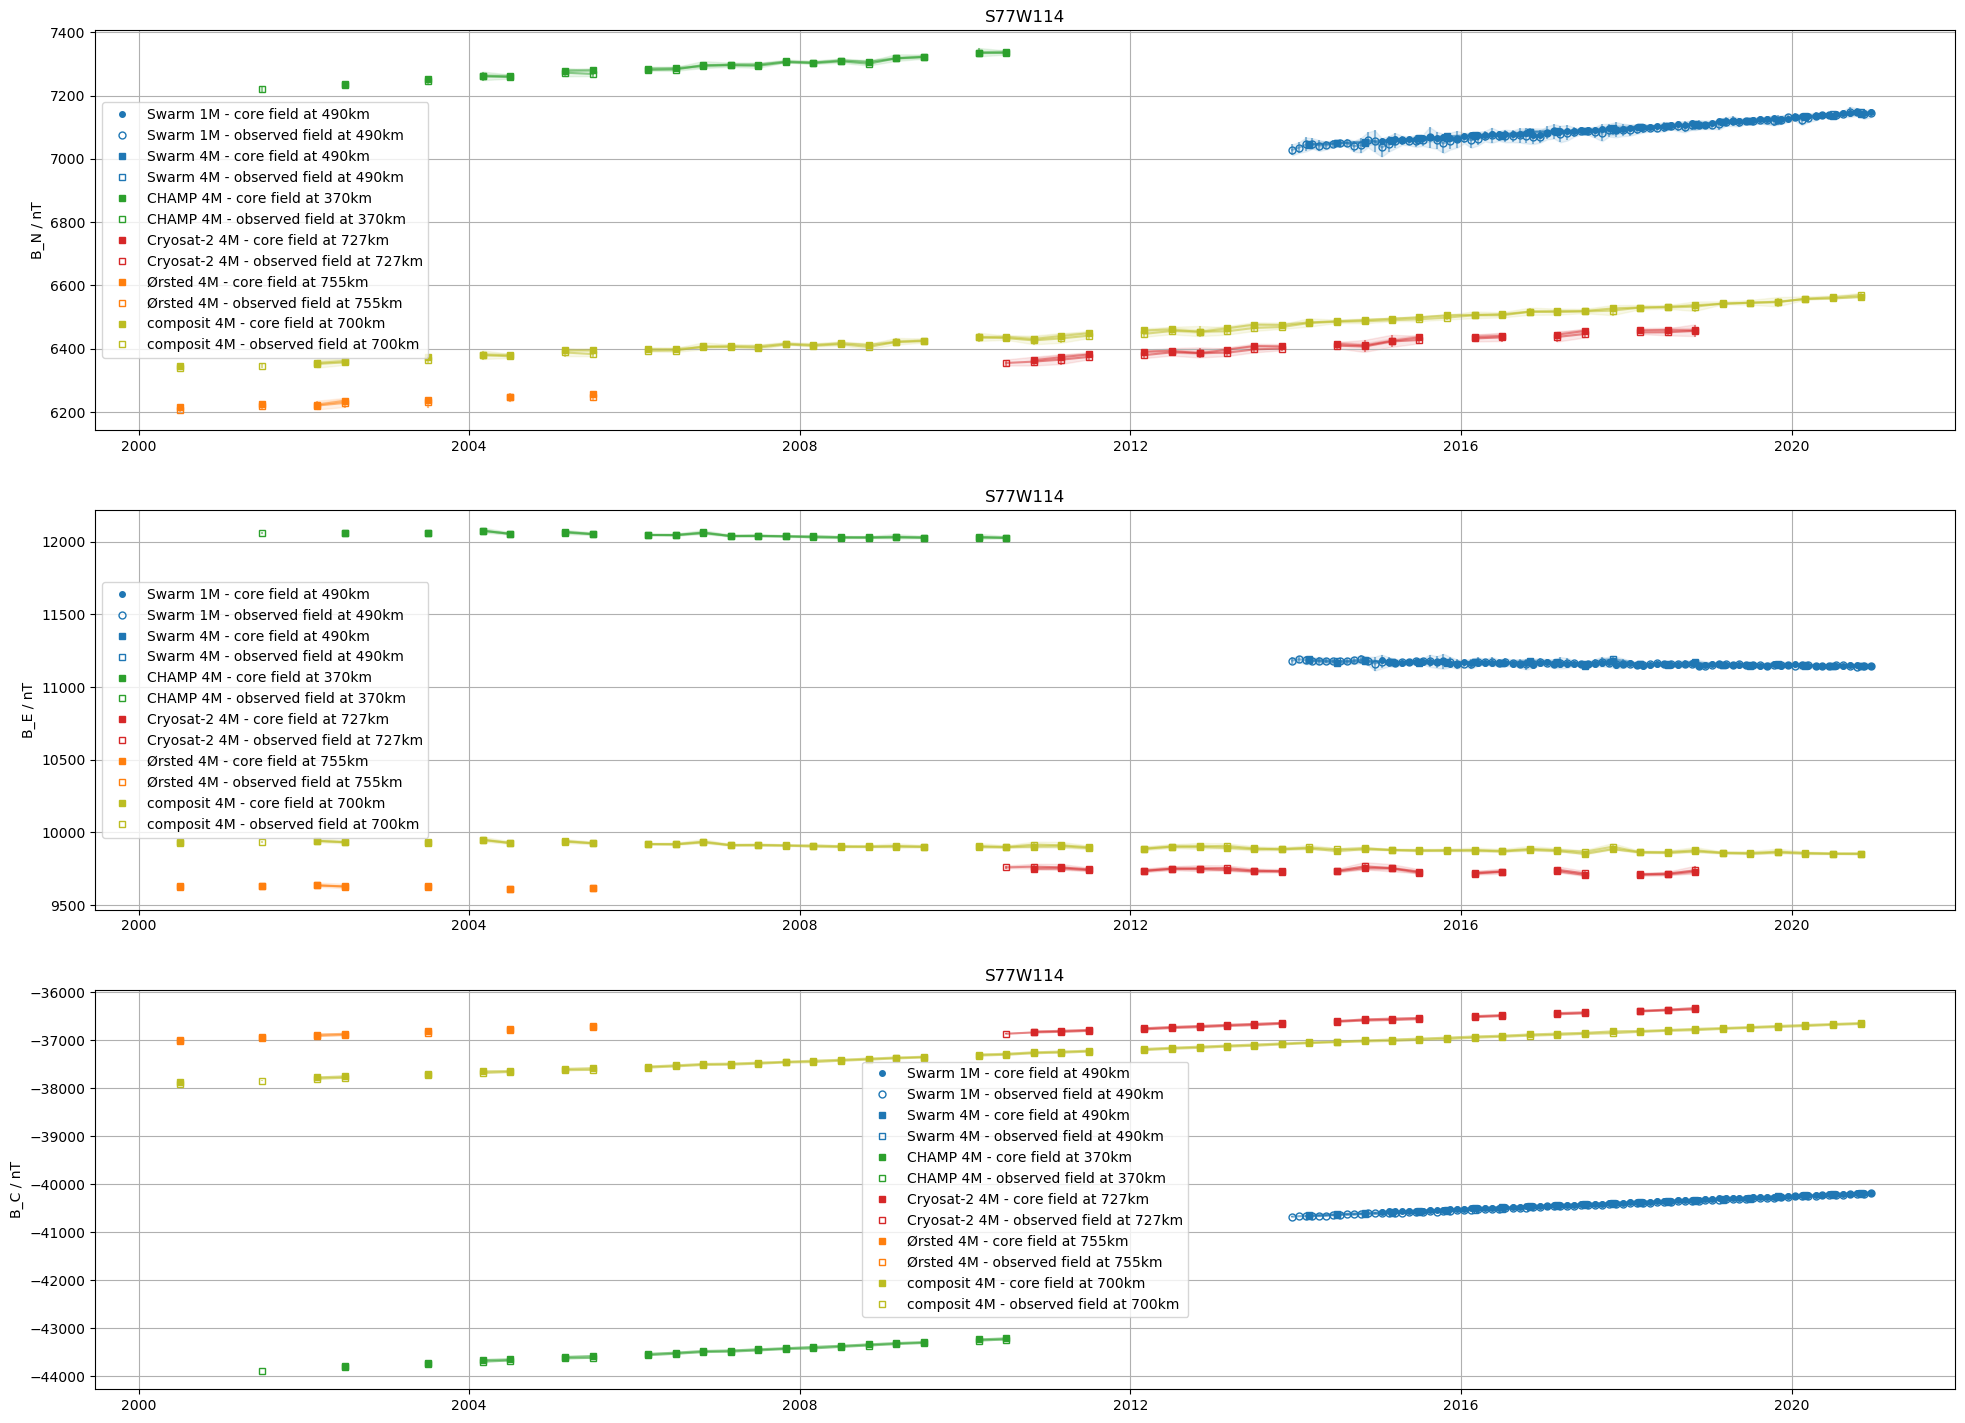

In [4]:
%matplotlib inline
fig = figure(figsize=(24, 18), dpi=100)

meta = {
    'SW_1M': {'mission': 'Swarm', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:blue'},
    'SW_4M': {'mission': 'Swarm', 'sampling': '4M', 'symbol': 's', 'color': 'tab:blue'},
    #'CH_1M': {'mission': 'CHAMP', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:green'},
    'CH_4M': {'mission': 'CHAMP', 'sampling': '4M', 'symbol': 's', 'color': 'tab:green'},
    'CR_4M': {'mission': 'Cryosat-2', 'sampling': '4M', 'symbol': 's', 'color': 'tab:red'},
    'OR_4M': {'mission': 'Ørsted', 'sampling': '4M', 'symbol': 's', 'color': 'tab:orange'},
    'CO_4M': {'mission': 'composit', 'sampling': '4M', 'symbol': 's', 'color': 'tab:olive'},
}

ax = subplot(3, 1, 1)
idx = 0
plots, labels = [], []
for type_, data_ in data.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_OB'].values[:, idx], data_['sigma_OB'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.errorbar(data_['Timestamp'].values, data_['B_CF'].values[:, idx], data_['sigma_CF'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_OB'].values[:, idx] - data_['sigma_OB'].values[:, idx],
        data_['B_OB'].values[:, idx] + data_['sigma_OB'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_CF'].values[:, idx] - data_['sigma_CF'].values[:, idx],
        data_['B_CF'].values[:, idx] + data_['sigma_CF'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field at {1e-3 * mean_altitude :.0f}km',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field at {1e-3 * mean_altitude :.0f}km'
    ])
ax.set_title(site)
ax.set_ylabel('B_N / nT')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 2)
idx = 1
plots, labels = [], []
for type_, data_ in data.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_OB'].values[:, idx], data_['sigma_OB'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.errorbar(data_['Timestamp'].values, data_['B_CF'].values[:, idx], data_['sigma_CF'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_OB'].values[:, idx] - data_['sigma_OB'].values[:, idx],
        data_['B_OB'].values[:, idx] + data_['sigma_OB'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_CF'].values[:, idx] - data_['sigma_CF'].values[:, idx],
        data_['B_CF'].values[:, idx] + data_['sigma_CF'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field at {1e-3 * mean_altitude :.0f}km',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field at {1e-3 * mean_altitude :.0f}km'
    ])
ax.set_title(site)
ax.set_ylabel('B_E / nT')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 3)
idx = 2
plots, labels = [], []
for type_, data_ in data.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_OB'].values[:, idx], data_['sigma_OB'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.errorbar(data_['Timestamp'].values, data_['B_CF'].values[:, idx], data_['sigma_CF'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_OB'].values[:, idx] - data_['sigma_OB'].values[:, idx],
        data_['B_OB'].values[:, idx] + data_['sigma_OB'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_CF'].values[:, idx] - data_['sigma_CF'].values[:, idx],
        data_['B_CF'].values[:, idx] + data_['sigma_CF'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field at {1e-3 * mean_altitude :.0f}km',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field at {1e-3 * mean_altitude :.0f}km'
    ])
ax.set_title(site)
ax.set_ylabel('B_C / nT')
ax.grid()
ax.legend(plots, labels)
;


''

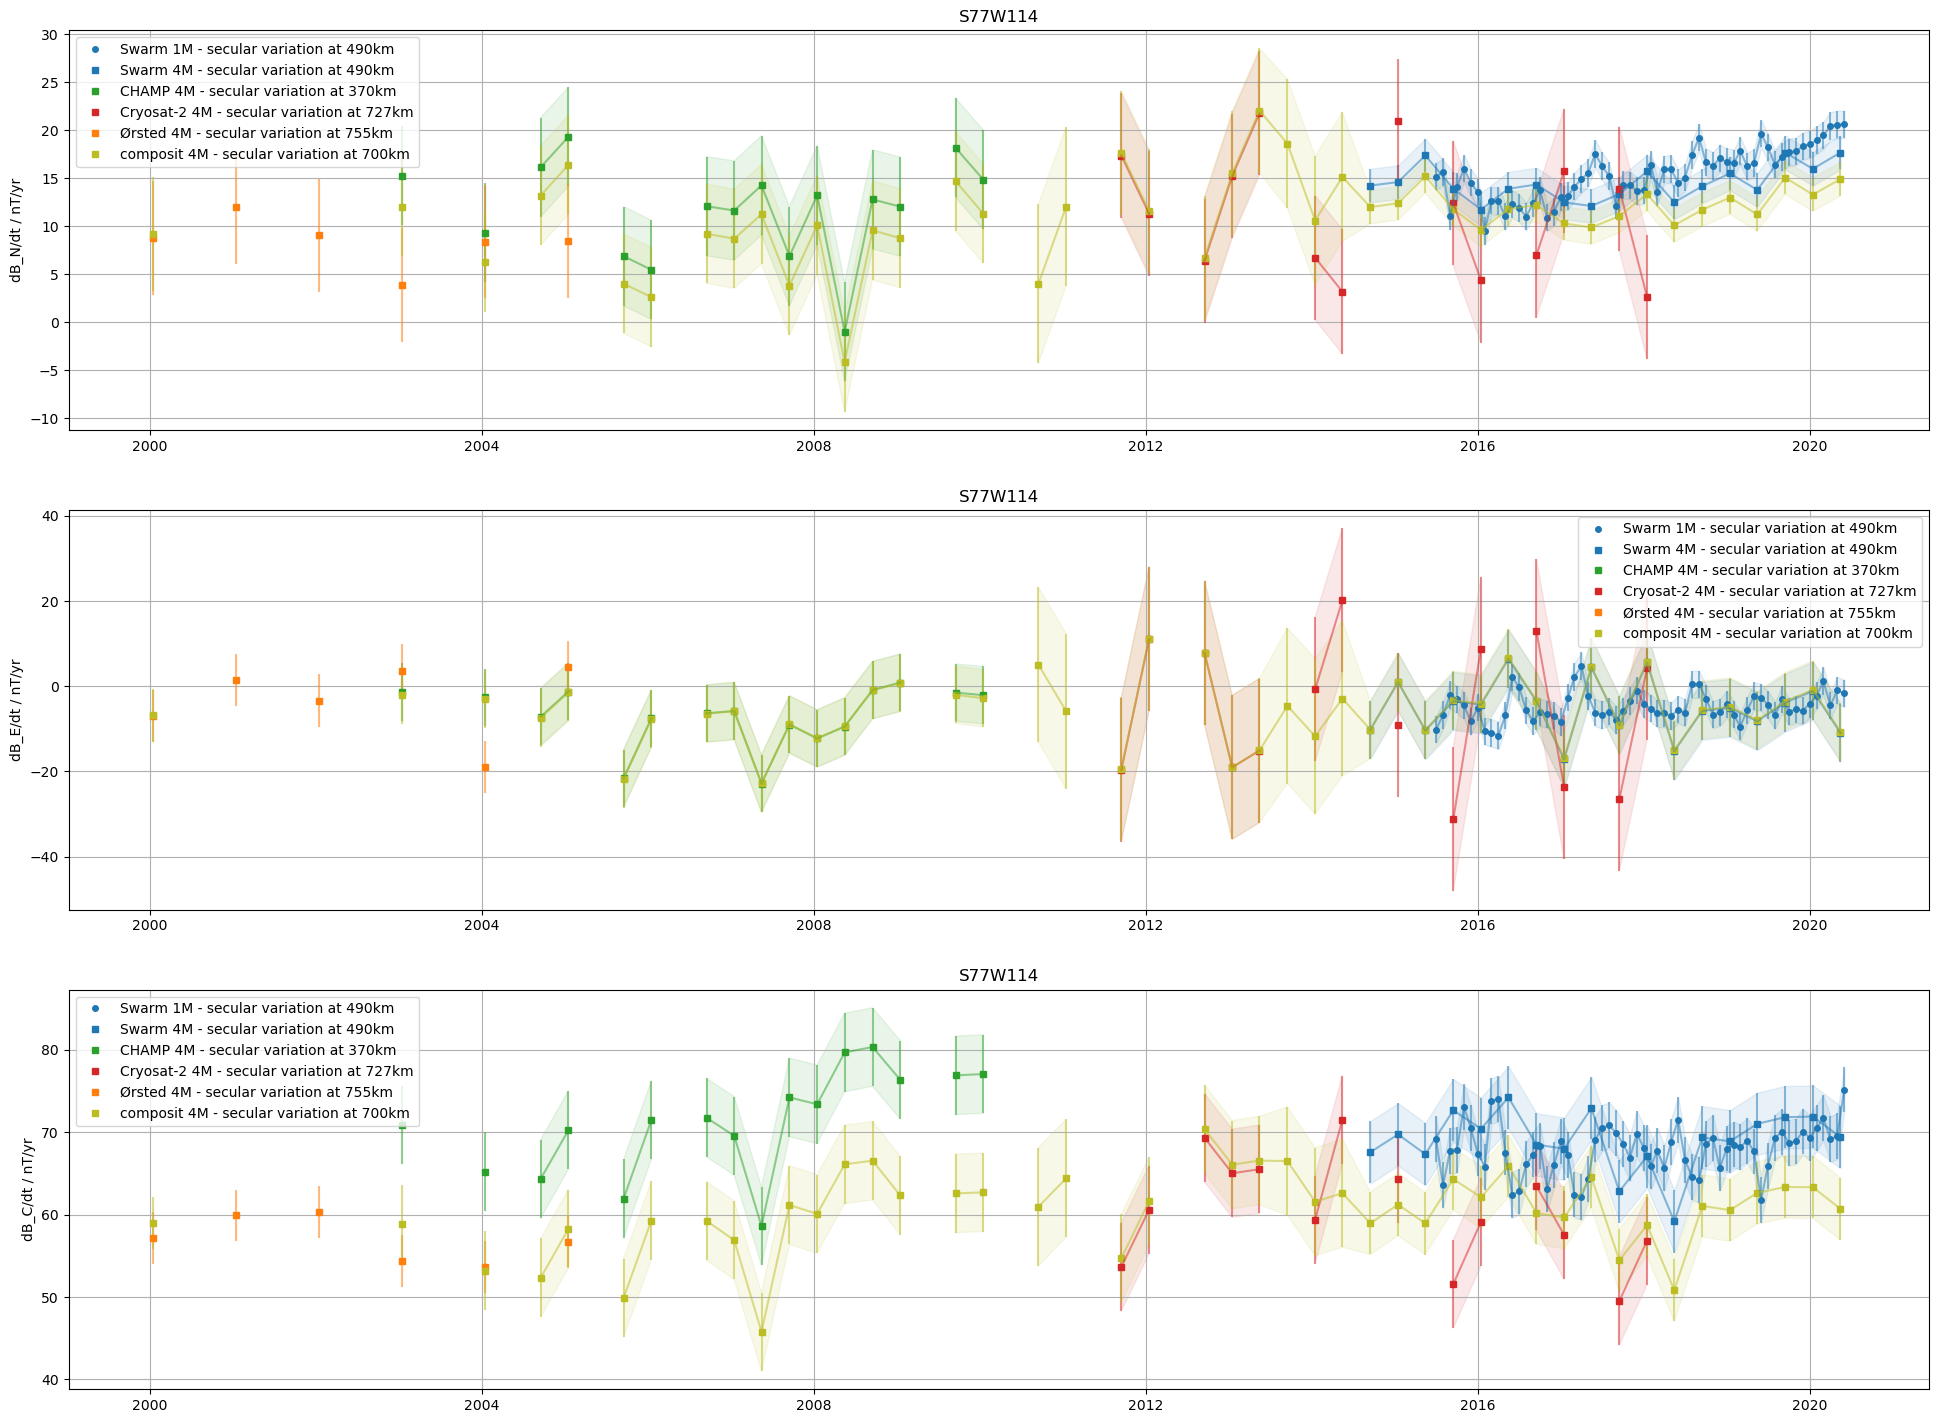

In [5]:
%matplotlib inline
fig = figure(figsize=(24, 18), dpi=100)

meta = {
    'SW_1M': {'mission': 'Swarm', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:blue'},
    'SW_4M': {'mission': 'Swarm', 'sampling': '4M', 'symbol': 's', 'color': 'tab:blue'},
    #'CH_1M': {'mission': 'CHAMP', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:green'},
    'CH_4M': {'mission': 'CHAMP', 'sampling': '4M', 'symbol': 's', 'color': 'tab:green'},
    'CR_4M': {'mission': 'Cryosat-2', 'sampling': '4M', 'symbol': 's', 'color': 'tab:red'},
    'OR_4M': {'mission': 'Ørsted', 'sampling': '4M', 'symbol': 's', 'color': 'tab:orange'},
    'CO_4M': {'mission': 'composit', 'sampling': '4M', 'symbol': 's', 'color': 'tab:olive'},
}

ax = subplot(3, 1, 1)
idx = 0
plots, labels = [], []
for type_, data_ in data_sv.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_SV'].values[:, idx], data_['sigma_SV'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_SV'].values[:, idx] - data_['sigma_SV'].values[:, idx],
        data_['B_SV'].values[:, idx] + data_['sigma_SV'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data_sv.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_SV'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.append(f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - secular variation at {1e-3 * mean_altitude :.0f}km')

ax.set_title(site)
ax.set_ylabel('dB_N/dt / nT/yr')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 2)
idx = 1
plots, labels = [], []
for type_, data_ in data_sv.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_SV'].values[:, idx], data_['sigma_SV'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_SV'].values[:, idx] - data_['sigma_SV'].values[:, idx],
        data_['B_SV'].values[:, idx] + data_['sigma_SV'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data_sv.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_SV'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.append(f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - secular variation at {1e-3 * mean_altitude :.0f}km')
ax.set_title(site)
ax.set_ylabel('dB_E/dt / nT/yr')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 3)
idx = 2
plots, labels = [], []
for type_, data_ in data_sv.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_SV'].values[:, idx], data_['sigma_SV'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_SV'].values[:, idx] - data_['sigma_SV'].values[:, idx],
        data_['B_SV'].values[:, idx] + data_['sigma_SV'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data_sv.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_SV'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.append(f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - secular variation at {1e-3 * mean_altitude :.0f}km')
ax.set_title(site)
ax.set_ylabel('dB_C/dt / nT/yr')
ax.grid()
ax.legend(plots, labels)
;